In [21]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister

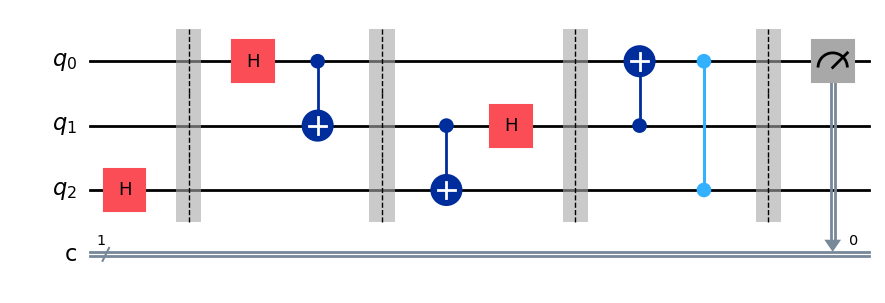

In [22]:
qc = QuantumCircuit(3, 1)

# init q2 to H
qc.h(2)
qc.barrier()

# init Bell state with q1 and q2
qc.h(0)
qc.cx(0,1)
qc.barrier()

# Bell meas. q1, q2 (project to Bell basis)
qc.cx(1,2)
qc.h(1)
qc.barrier()
# teleport q2 -> q1

qc.cx(1,0)
qc.cz(2,0)
qc.barrier()

# measure
qc.measure(0,0)

qc.draw('mpl')

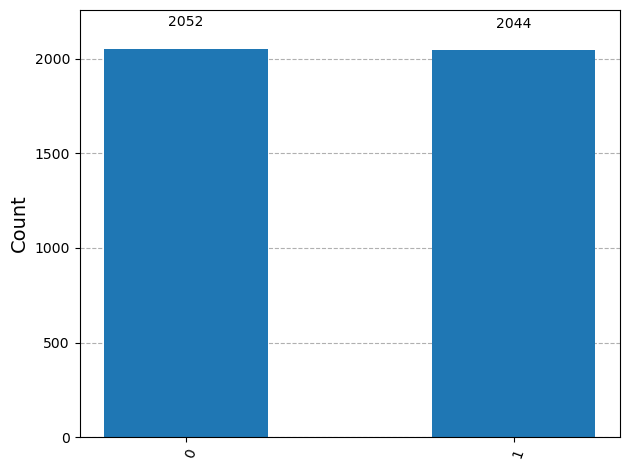

In [23]:
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=4096).result()
plot_histogram(result.get_counts())

# Using IBM Quanutm Cloud services

In [24]:
from dotenv import load_dotenv
import os
load_dotenv()
api_key = os.getenv('IBM_API_KEY')

In [25]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime.fake_provider import FakeTorino
service = QiskitRuntimeService("ibm_quantum_platform", api_key)
service.backends()

qiskit_runtime_service._resolve_cloud_instances:WARNING:2025-09-24 12:21:59,935: Default instance not set. Searching all available instances.


[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_torino')>]

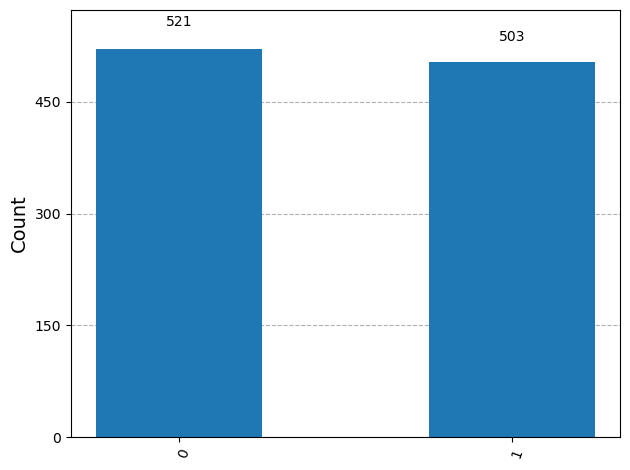

In [ ]:
backend = FakeTorino()
transpiled_circuit = transpile(qc, backend)
transpiled_circuit.draw('mpl')
job = backend.run(transpiled_circuit)
counts = job.result().get_counts()
plot_histogram(counts)

In [26]:
from qiskit_ibm_runtime import SamplerV2
import time

backend = service.backend('ibm_torino')
qc_transpiled = transpile(qc, backend=backend)
print(type(backend))

<class 'qiskit_ibm_runtime.ibm_backend.IBMBackend'>


In [27]:
status = backend.status()
is_operational = status.operational
jobs_in_queue = status.pending_jobs
print(f"Operational: {is_operational}, Queue: {jobs_in_queue}")

Operational: True, Queue: 548


In [28]:
sampler = SamplerV2(mode=backend)
job = sampler.run([qc_transpiled], shots=1024)

# Monitor queue position with tqdm
from tqdm import tqdm
print(f"Job ID: {job.job_id()}")
with tqdm(desc="Queue position", bar_format='{desc}: {n}') as pbar:
    while job.status() not in ['DONE', 'ERROR', 'CANCELLED']:
        try:
            queue_pos = job.queue_position()
            pbar.set_description(f"Queue position")
            pbar.n = queue_pos
            pbar.refresh()
        except:
            status = job.status()
            pbar.set_description(f"Status: {status}")
            pbar.n = 0
            pbar.refresh()
        time.sleep(5)

# Get results
result = job.result()
# Your circuit has 1 classical bit, default register name is 'c'
counts = result[0].data.c.get_counts()
print(f"Results: {counts}")

Job ID: d3a1ljulahfs739uj9qg


Status: QUEUED: : 0

Results: {'1': 524, '0': 500}
